In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [306]:
file_path = r'C:\Users\shour\Downloads\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv'

In [308]:
train = pd.read_csv(file_path)

In [310]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [312]:
#Viewing missing data 
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

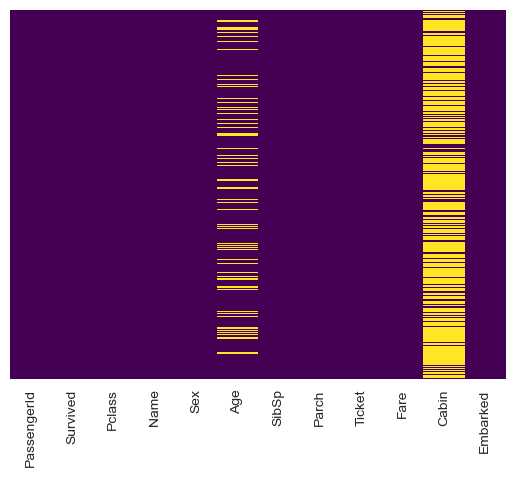

In [314]:
#shwoing empty values in heatmap
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [316]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

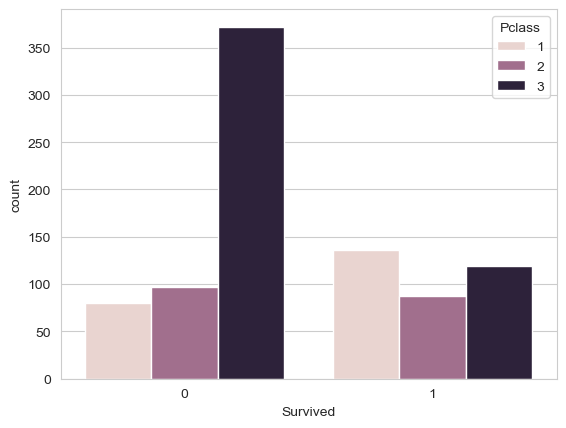

In [318]:
sns.countplot(x ='Survived', data = train, hue ='Pclass')

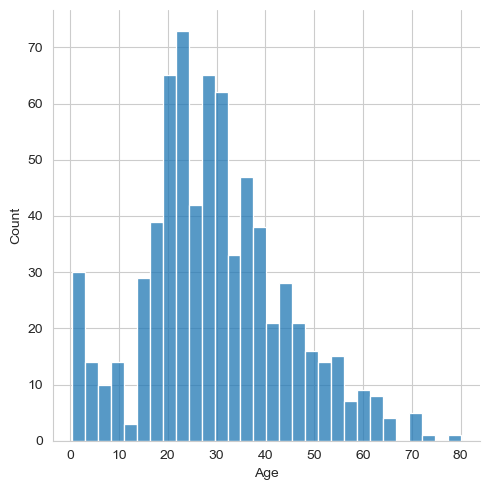

In [320]:
sns.displot(train['Age'].dropna(), kde = False, bins = 30)

<Axes: ylabel='Frequency'>

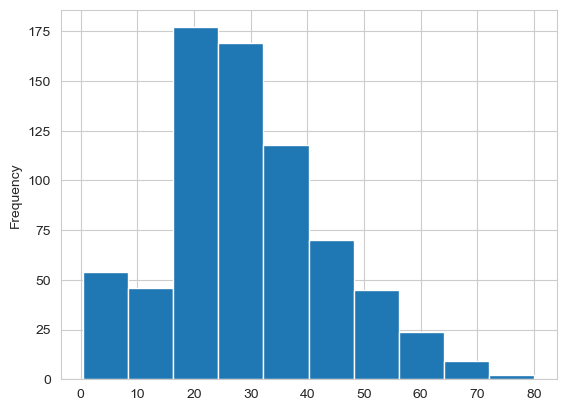

In [322]:
train['Age'].plot.hist()

<Axes: xlabel='Pclass', ylabel='Age'>

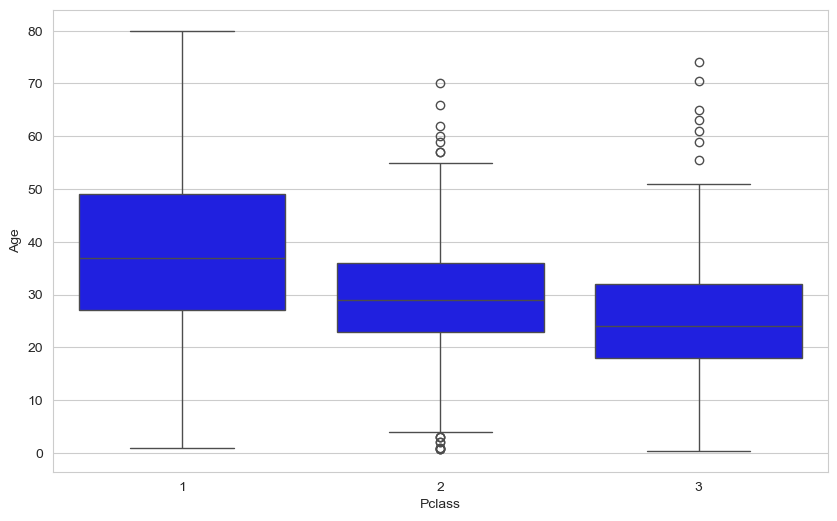

In [324]:
plt.figure(figsize = (10,6))
sns.boxplot(x= 'Pclass', y = 'Age', data= train, color = 'blue')


In [326]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24

    else:
        return Age

        


In [328]:
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 37  
        elif Pclass == 2:
            return 29  
        else:
            return 24 
    else:
        return Age

# Apply the function to the DataFrame
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

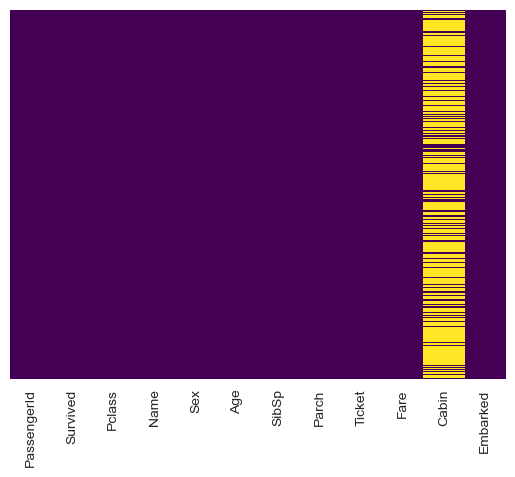

In [330]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [332]:
train.drop('Cabin', axis = 1, inplace= True)

In [334]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [336]:
train.dropna(inplace = True)

<Axes: >

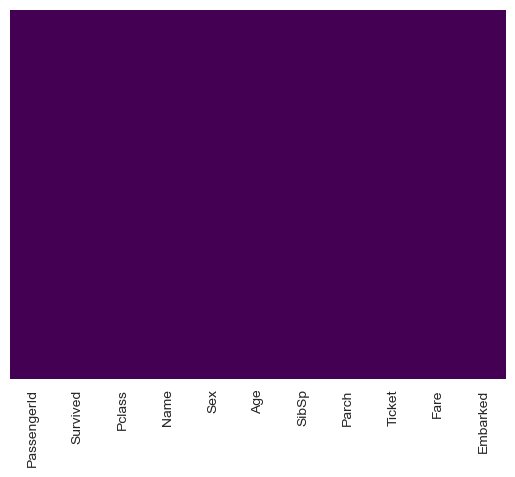

In [338]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [340]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [342]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [344]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [346]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [348]:
train = pd.concat([train,sex, embark],axis = 1)

In [350]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [352]:
train.drop(['Sex', 'Name', 'Ticket','Embarked'] ,axis =1, inplace = True)

In [354]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [358]:

train[['male', 'Q', 'S']] = train[['male', 'Q', 'S']].astype(int)


In [360]:
#Only Numbers no strings
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [362]:
#Drop unnecessary columns

train.drop('PassengerId', axis = 1, inplace = True)

In [364]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [368]:
X= train[['Pclass', 'Age', 'SibSp','Parch', 'Fare', 'male', 'Q','S']]
y = train['Survived']

In [370]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [374]:
from sklearn.linear_model import LogisticRegression

In [376]:
logmodel = LogisticRegression()

In [378]:
logmodel.fit(X_train, y_train)

C:\Users\shour\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [380]:
predictions = logmodel.predict(X_test)

In [382]:
from sklearn.metrics import classification_report

In [384]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [386]:
from sklearn.metrics import confusion_matrix

In [388]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [392]:
f_p = r'C:\Users\shour\Downloads\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_test.csv'

In [394]:
test = pd.read_csv(f_p)

<Axes: >

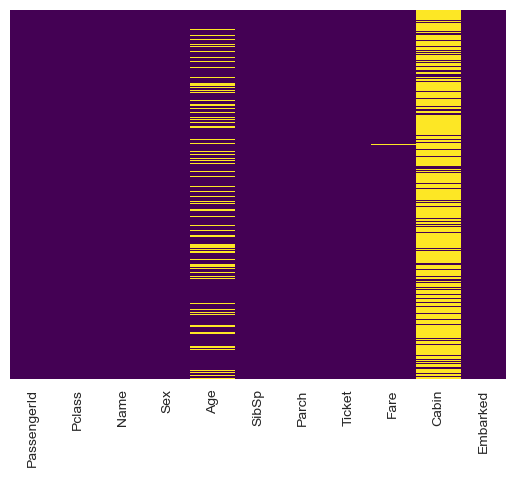

In [262]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

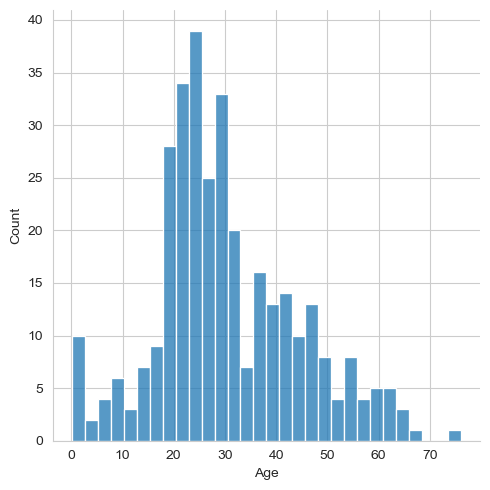

In [396]:
sns.displot(test['Age'].dropna(), kde = False, bins = 30)

<Axes: ylabel='Frequency'>

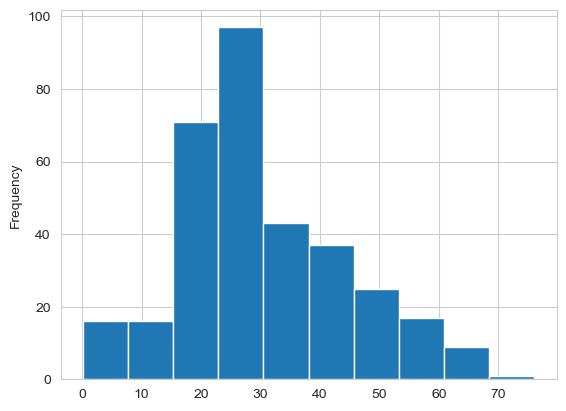

In [398]:
test['Age'].plot.hist()

<Axes: xlabel='Pclass', ylabel='Age'>

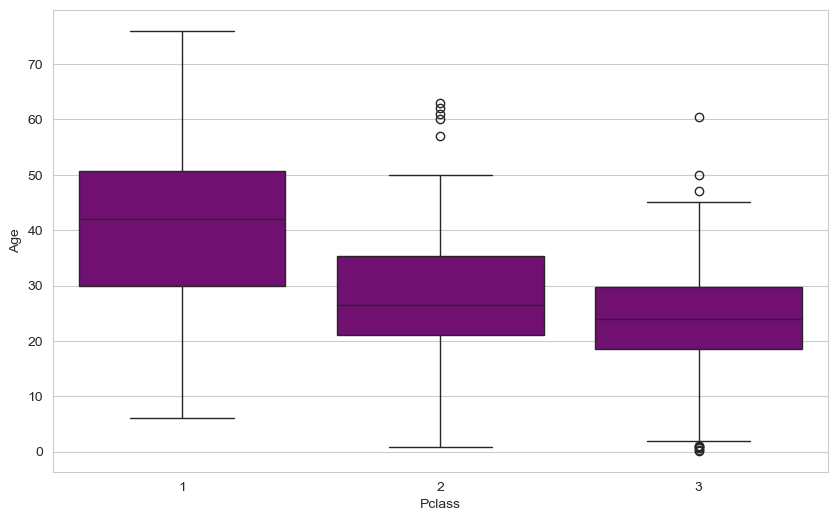

In [400]:
plt.figure(figsize = (10,6))
sns.boxplot(x= 'Pclass', y = 'Age', data= test, color = 'purple')


In [402]:
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 37  
        elif Pclass == 2:
            return 29  
        else:
            return 24 
    else:
        return Age

# Apply the function to the DataFrame
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

        

<Axes: >

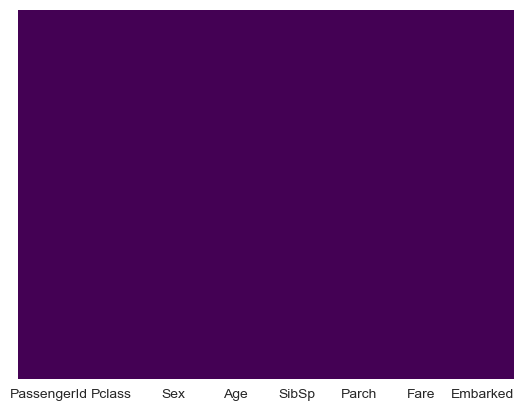

In [416]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [422]:
test.drop('PassengerId', axis= 1, inplace= True)

In [424]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,female,23.0,1,0,82.2667,S
14,1,female,47.0,1,0,61.1750,S
24,1,female,48.0,1,3,262.3750,C
26,1,female,22.0,0,1,61.9792,C
28,1,male,41.0,0,0,30.5000,S


In [426]:
test.dropna(inplace = True)

In [420]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,904,1,female,23.0,1,0,82.2667,S
14,906,1,female,47.0,1,0,61.1750,S
24,916,1,female,48.0,1,3,262.3750,C
26,918,1,female,22.0,0,1,61.9792,C
28,920,1,male,41.0,0,0,30.5000,S


In [428]:
sex = pd.get_dummies(test['Sex'], drop_first = True)

In [430]:
embark = pd.get_dummies(test['Embarked'], drop_first = True)

In [284]:
sex.head()

,male
12,False
14,False
24,False
26,False
28,True


In [286]:
embark.head()

,Q,S
12,False,True
14,False,True
24,False,False
26,False,False
28,False,True


In [432]:
test = pd.concat([test, sex, embark], axis = 1)

In [434]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
12,1,female,23.0,1,0,82.2667,S,False,False,True
14,1,female,47.0,1,0,61.1750,S,False,False,True
24,1,female,48.0,1,3,262.3750,C,False,False,False
26,1,female,22.0,0,1,61.9792,C,False,False,False
28,1,male,41.0,0,0,30.5000,S,True,False,True


In [436]:
test.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [440]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,1,23.0,1,0,82.2667,False,False,True
14,1,47.0,1,0,61.1750,False,False,True
24,1,48.0,1,3,262.3750,False,False,False
26,1,22.0,0,1,61.9792,False,False,False
28,1,41.0,0,0,30.5000,True,False,True


In [444]:
test[['male', 'Q', 'S']] = test[['male', 'Q', 'S']].astype(int)
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,1,23.0,1,0,82.2667,0,0,1
14,1,47.0,1,0,61.1750,0,0,1
24,1,48.0,1,3,262.3750,0,0,0
26,1,22.0,0,1,61.9792,0,0,0
28,1,41.0,0,0,30.5000,1,0,1


In [446]:
prediction = logmodel.predict(test)

In [452]:
prediction_df = pd.DataFrame(prediction, columns=['Survived'])

In [456]:
prediction_df.head(10)

,Survived
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,1
8,0
9,1


In [458]:
if len(test) != len(prediction_df):
    raise ValueError("The number of rows in prediction_df does not match test.")

In [464]:
test_prediction = test.copy()

In [466]:
test_prediction['Survived'] = prediction_df['Survived'].values

In [468]:
test_prediction.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
12,1,23.0,1,0,82.2667,0,0,1,1
14,1,47.0,1,0,61.1750,0,0,1,1
24,1,48.0,1,3,262.3750,0,0,0,1
26,1,22.0,0,1,61.9792,0,0,0,1
28,1,41.0,0,0,30.5000,1,0,1,0


In [470]:
#Saving this file

In [474]:
test_prediction.to_csv('test_with_predictions.csv', index=False)

In [482]:
fp2 = r'C:\Users\shour\Downloads\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_test.csv'

In [484]:
titanic_test = pd.read_csv(fp2)

In [486]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [488]:
test_prediction.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
12,1,23.0,1,0,82.2667,0,0,1,1
14,1,47.0,1,0,61.1750,0,0,1,1
24,1,48.0,1,3,262.3750,0,0,0,1
26,1,22.0,0,1,61.9792,0,0,0,1
28,1,41.0,0,0,30.5000,1,0,1,0


In [490]:
assert len(titanic_test) == len(prediction_df), "Length of titanic_test and prediction_df must match"

AssertionError: Length of titanic_test and prediction_df must match